In [ ]:
pip install tensorflow

In [ ]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow import keras
model_alexnet=keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(256,256,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024,activation='relu'),
    #keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,activation='relu'),
    #keras.layers.Dropout(0.5),
    keras.layers.Dense(3,activation='softmax')])
# Compile the model
model_alexnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model_alexnet.summary()

# Data augmentation and normalization
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.5, 1.3],
    fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the training, validation, and test datasets
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/potato_leaf_disease_classification/Train', target_size=(256, 256), batch_size=16, class_mode='categorical',color_mode="rgb")
validation_set = val_datagen.flow_from_directory('/content/drive/MyDrive/potato_leaf_disease_classification/Validation', target_size=(256, 256), batch_size=16, class_mode='categorical',color_mode="rgb")
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/potato_leaf_disease_classification/Test', target_size=(256, 256), batch_size=16, class_mode='categorical',color_mode="rgb")

# Train the model
history = model_alexnet.fit(training_set, steps_per_epoch=20, epochs=50, validation_data=validation_set, validation_steps=20)

# Evaluate the model
test_loss, test_acc = model_alexnet.evaluate(test_set, verbose=2)
print("\n\n")
print("Test Loss: \t", test_loss, "\n")
print("Test Accuracy: \t", test_acc, "\n")

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)                   │ (None, 62, 62, 128)         │          46,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 62, 62, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 31, 31, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 31, 31, 256)         │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_31               │ (None, 31, 31, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (None, 10, 10, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_32               │ (None, 10, 10, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 10, 10, 256)         │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_33               │ (None, 10, 10, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_44 (Conv2D)                   │ (None, 10, 10, 256)         │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_34               │ (None, 10, 10, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 1024)                │       6,554,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 3)                   │           3,075 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,199,619 (35.09 MB)

 Trainable params: 9,197,315 (35.08 MB)

 Non-trainable params: 2,304 (9.00 KB)

Found 1292 images belonging to 3 classes.
Found 430 images belonging to 3 classes.
Found 430 images belonging to 3 classes.
Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 457ms/step - accuracy: 0.3982 - loss: 6.5095 - val_accuracy: 0.4875 - val_loss: 15.3139
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 488ms/step - accuracy: 0.5356 - loss: 1.2443 - val_accuracy: 0.4273 - val_loss: 3.4287
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 416ms/step - accuracy: 0.5600 - loss: 0.9581 - val_accuracy: 0.4531 - val_loss: 4.4180
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 204ms/step - accuracy: 0.6139 - loss: 1.0170 - val_accuracy: 0.4636 - val_loss: 2.0415
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.7500 - loss: 0.4975 - val_accuracy: 0.4469 - val_loss: 2.7199
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 859ms/step - accuracy: 0.6236 - loss: 1.0826 - val_accuracy: 0.7273 - val_loss: 0.7004
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 384ms/step - accuracy: 0.7499 - loss: 0.5501 - val_accuracy: 0.75

In [ ]:
pip install tensorflow

In [ ]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# AlexNet-inspired model
model_alexnet = keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(256, 256, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3, 3)),
    keras.layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    # keras.layers.Dropout(0.5),
    keras.layers.Dense(1024, activation='relu'),
    # keras.layers.Dropout(0.5),
    keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model_alexnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model_alexnet.summary()

# Data augmentation and normalization
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.5, 1.3],
    fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the training, validation, and test datasets
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/potato_leaf_disease_classification/Train', target_size=(256, 256), batch_size=16, class_mode='categorical', color_mode="rgb")
validation_set = val_datagen.flow_from_directory('/content/drive/MyDrive/potato_leaf_disease_classification/Validation', target_size=(256, 256), batch_size=16, class_mode='categorical', color_mode="rgb")
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/potato_leaf_disease_classification/Test', target_size=(256, 256), batch_size=16, class_mode='categorical', color_mode="rgb")

# Early stopping callback
earlystop_callback = EarlyStopping(monitor='val_accuracy',
                                   min_delta=0.0001,
                                   patience=5,
                                   verbose=1,
                                   restore_best_weights=True)

# Model checkpoint callback
checkpoint_callback = ModelCheckpoint(filepath='best_model.keras',
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

# Train the model with callbacks
history = model_alexnet.fit(training_set,
                            steps_per_epoch=20,
                            epochs=50,
                            validation_data=validation_set,
                            validation_steps=20,
                            callbacks=[earlystop_callback, checkpoint_callback])

# Evaluate the model
test_loss, test_acc = model_alexnet.evaluate(test_set, verbose=2)
print("\n\n")
print("Test Loss: \t", test_loss, "\n")
print("Test Accuracy: \t", test_acc, "\n")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_35 (Conv2D)                   │ (None, 62, 62, 128)         │          46,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 62, 62, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 31, 31, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 31, 31, 256)         │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 31, 31, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 10, 10, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_27               │ (None, 10, 10, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 10, 10, 256)         │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_28               │ (None, 10, 10, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 10, 10, 256)         │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_29               │ (None, 10, 10, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1024)                │       6,554,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 3)                   │           3,075 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,199,619 (35.09 MB)

 Trainable params: 9,197,315 (35.08 MB)

 Non-trainable params: 2,304 (9.00 KB)

Found 1292 images belonging to 3 classes.
Found 430 images belonging to 3 classes.
Found 430 images belonging to 3 classes.
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step - accuracy: 0.4956 - loss: 4.9982
Epoch 1: val_accuracy improved from -inf to 0.47500, saving model to best_model.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 663ms/step - accuracy: 0.4959 - loss: 4.9531 - val_accuracy: 0.4750 - val_loss: 11.2052
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - accuracy: 0.5708 - loss: 1.5210

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_accuracy did not improve from 0.47500
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 918ms/step - accuracy: 0.5722 - loss: 1.5084 - val_accuracy: 0.3545 - val_loss: 2.6841
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - accuracy: 0.5813 - loss: 1.0236
Epoch 3: val_accuracy did not improve from 0.47500
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 338ms/step - accuracy: 0.5827 - loss: 1.0247 - val_accuracy: 0.4375 - val_loss: 1.2018
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.6272 - loss: 0.9566
Epoch 4: val_accuracy did not improve from 0.47500
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - accuracy: 0.6278 - loss: 0.9558 - val_accuracy: 0.4091 - val_loss: 1.7078
Epoch 5/50
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6250 - loss: 0.9066
Epoch 5: val_accuracy improved from 0.47500 to 0.63437, saving model to best_model.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step - accuracy: 0.6250 - loss: 0.9066 - val_accuracy: 0.6344 - val_loss: 0.9052
Epoch 6/50
20/20 ━━━━━━━━━━━━━━

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


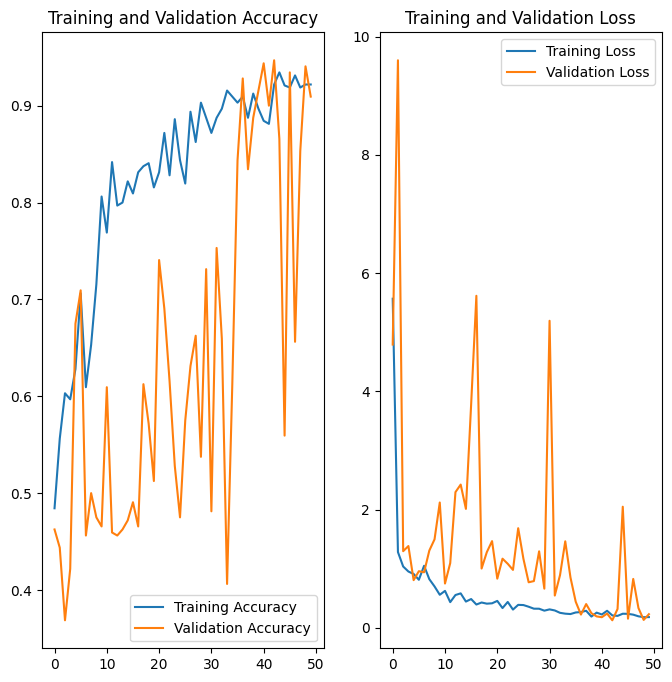

In [ ]:
from matplotlib import pyplot as plt
EPOCHS = 50
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import numpy as np
from keras.preprocessing import image
import keras.utils as image

# Load and preprocess the test image
test_image = image.load_img('/content/drive/MyDrive/Potato_Healthy.jpg', target_size=(256, 256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Predict the class of the test image
result = model_alexnet.predict(test_image)
print(result)

# Assuming the class indices mapping
# training_set.class_indices will return a dictionary like {'class1': 0, 'class2': 1, 'class3': 2}
class_indices = training_set.class_indices
class_labels = {v: k for k, v in class_indices.items()}  # Reverse the dictionary to get labels from indices

# Get the predicted class index
predicted_class_index = np.argmax(result, axis=1)[0]
prediction = class_labels[predicted_class_index]

print(prediction)

1/1 [==============================] - 0s 275ms/step
[[0. 0. 1.]]
Potato___healthy


In [ ]:
import numpy as np
from keras.preprocessing import image
import keras.utils as image

# Load and preprocess the test image
test_image = image.load_img('/content/drive/MyDrive/test_potato_early_blight.jpg', target_size=(256, 256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Predict the class of the test image
result = model_alexnet.predict(test_image)
print(result)

# Assuming the class indices mapping
# training_set.class_indices will return a dictionary like {'class1': 0, 'class2': 1, 'class3': 2}
class_indices = training_set.class_indices
class_labels = {v: k for k, v in class_indices.items()}  # Reverse the dictionary to get labels from indices

# Get the predicted class index
predicted_class_index = np.argmax(result, axis=1)[0]
prediction = class_labels[predicted_class_index]

print(prediction)

1/1 [==============================] - 0s 57ms/step
[[1.7731493e-16 1.0000000e+00 1.6529787e-37]]
Potato___Late_blight
